In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import binarize
from sklearn.externals import joblib
import nltk
import pickle
import  dill as pickle
cols_names =  [ 'HADM_ID', 'CHARTTIME', 'CATEGORY', 'DESCRIPTION', 'ICU Admit Time', 'TEXT', 'Note2', 'Note3', 'Note Difference', 'Group_Text', 'PreICU LOS', 'Hosp_Death', 'ICU_Mortality', 'AGE', 'Gender M=1F=0', 'MAP', 'Systolic', 'Avg Diastolic', 'Avg HR', 'AVG RR', 'Avg T', 'Min T', 'Avg Alb', 'Avg AG', 'Avg Cr', 'Avg WBC', 'Min WBC', 'PT avg', 'Avg Hgb', 'Plt', 'Na', 'Avg Gluc', 'Avg K', 'GCS'
]
%matplotlib inline

C:\Users\mvf11\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_excel(r"C:\Users\mvf11\Desktop\Research\NLP\NoteMort.xlsx", "Sheet1", header=None, names=cols_names)
data [0:10]

,HADM_ID,CHARTTIME,CATEGORY,DESCRIPTION,ICU Admit Time,TEXT,Note2,Note3,Note Difference,Group_Text,...,Avg Cr,Avg WBC,Min WBC,PT avg,Avg Hgb,Plt,Na,Avg Gluc,Avg K,GCS
0,165715,2181-11-22 06:07:00,Physician,Note,2181-11-23 17:47:33,SICU\n HPI:\n 53 yo M with in [**9-16**] h...,SICU\n HPI:\n 53 yo M with in [**9-16**] h...,NaN,-1.486493,SICU\n HPI:\n 53 yo M with in [**9-16**] h...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,14.000000
1,103098,2176-11-20 06:18:00,Physician,Intensivist Note,2176-11-21 16:31:59,CVICU\n HPI:\n HD2\n [**11-20**] POD 1\n...,CVICU\n HPI:\n HD2\n [**11-20**] POD 1\n...,NaN,-1.426377,CVICU\n HPI:\n HD2\n [**11-20**] POD 1\n...,...,0.70,5.70,5.7,16.50,NaN,182.0,138.0,133.0,4.70,10.000000
2,175432,2108-01-23 04:46:00,Physician,Intensivist Note,2160-07-09 18:12:58,TITLE:\n Chief Complaint:\n 24 Hour Events...,"TITLE:\n Chief Complaint: Rigors, shortness...",TITLE:\n Chief Complaint:\n 24 Hour Events...,0.476412,TITLE:\n Chief Complaint:\n 24 Hour Events...,...,0.90,3.00,3.0,15.20,10.6,102.0,139.0,83.0,3.70,13.333333
3,181315,2117-11-18 18:03:00,Physician,Intensivist Note,2168-11-04 16:33:48,Chief Complaint: OSH transfer from [**Hospita...,"Chief Complaint: MRSA sepsis, access issues.\n...",Chief Complaint: OSH transfer from [**Hospita...,0.127222,Chief Complaint: OSH transfer from [**Hospita...,...,8.45,11.40,10.5,18.70,8.0,68.5,133.5,91.0,3.75,15.000000
4,187311,2125-11-20 08:24:00,Physician,Physician Attending Admission Note - MICU,2124-09-13 23:18:28,Chief Complaint: Intracranial hemorrhage\n H...,Chief Complaint: Intracranial hemorrhage\n H...,NaN,0.142037,Chief Complaint: Intracranial hemorrhage\n H...,...,1.00,27.50,27.5,14.80,13.9,123.0,114.0,121.0,3.80,7.666667
5,152311,2100-12-29 03:32:00,Physician,Intensivist Note,2145-05-22 00:07:53,SICU\n HPI:\n 48 y/o f s/p R free tram [**...,SICU\n HPI:\n 48 y/o f s/p R free tram [**...,NaN,0.139664,SICU\n HPI:\n 48 y/o f s/p R free tram [**...,...,0.70,14.30,13.3,15.10,8.7,224.5,140.0,136.0,3.60,14.333333
6,137296,2132-06-06 05:27:00,Physician,Physician Resident Admission Note,2188-12-18 10:36:04,CVICU\n HPI:\n HD3\n [**12-19**] POD [**...,NaN,NaN,0.927731,CVICU\n HPI:\n HD3\n [**12-19**] POD [**...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
7,145965,2133-02-18 22:01:00,Physician,Intensivist Note,2109-02-24 04:16:11,TITLE: Cardiology Fellow Admission Note Addend...,TITLE:\n Cardiology Teaching Physician Note\...,"Chief Complaint: Chest Pain, STEMI\n HPI:\n...",0.013067,TITLE: Cardiology Fellow Admission Note Addend...,...,1.00,10.60,10.1,NaN,15.2,285.5,137.0,87.0,4.30,15.000000
8,166086,2186-03-23 04:21:00,Physician,Cardiology Fellow Admission Note/ Addendum,2192-10-17 19:41:52,SICU\n HPI:\n 54 year old female presents ...,SICU\n HPI:\n 54 year old female presents ...,Chief Complaint: left cerebellar mass\n HPI:...,0.511204,SICU\n HPI:\n 54 year old female presents ...,...,0.70,6.45,5.1,12.90,12.4,259.5,139.0,142.0,4.20,10.000000
9,132994,2126-12-02 11:33:00,Physician,Intensivist Note,2144-12-24 16:16:41,Chief Complaint: Altered mental status\n HP...,Chief Complaint:\n 24 Hour Events:\n INVASIV...,Chief Complaint:\n 24 Hour Events:\n INVASIV...,0.334248,Chief Complaint: Altered mental status\n HP...,...,0.40,6.60,6.5,15.55,11.1,205.5,141.0,91.0,3.55,14.333333


In [3]:
#Label Encoding
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
#le = LabelEncoder()

In [5]:
#le.fit(data['CV'])
#data['CV'] = le.transform(data['CV'])

In [6]:
#data['CV'].unique()

In [7]:
data['Group_Text'] = data['Group_Text'].replace('\d+', 'NUM', regex=True)
data['Group_Text'] [0:10]

0    SICU\n   HPI:\n   NUM yo M with in [**NUM-NUM*...
1    CVICU\n   HPI:\n   HDNUM\n   [**NUM-NUM**] POD...
2    TITLE:\n   Chief Complaint:\n   NUM Hour Event...
3    Chief Complaint:  OSH transfer from [**Hospita...
4    Chief Complaint: Intracranial hemorrhage\n   H...
5    SICU\n   HPI:\n   NUM y/o f s/p R free tram [*...
6    CVICU\n   HPI:\n   HDNUM\n   [**NUM-NUM**] POD...
7    TITLE: Cardiology Fellow Admission Note Addend...
8    SICU\n   HPI:\n   NUM year old female presents...
9    Chief Complaint:  Altered mental status\n   HP...
Name: Group_Text, dtype: object

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
stopword = nltk.corpus.stopwords.words('english')
digit = ['aa', 'aao','aaoxnum','ab','chief','num','patient','nummg','__','_num', 'ml','mg', 'dl','icu', 'pm', 'history','medications','po','comments','hospitalnum','sponum', 'left', 'pain', 'total', 'right', 'last', 'meq', 'labs','respiratory', 'pulse', 'name', 'present', 'plan','code', 'balance', 'rhythm', 'pt', 'assessed', 'blood', 'fluid', 'hr', 'min', 'rr', 'assessment', 'chest', 'iv', 'normal', 'bp', 'status', 'urine', 'daily','given', 'edema', 'hct', 
'acute', 'allergies', 'care', 'extremities', 'ng', 'abdominal', 'snum', 'prn', 'heart', 'control', 'signs', 'likely','onum','dose', 'prophylaxis', 'continue', 'since', 'drains', 'hours', 'nutrition', 'ct', 'ul', 'mmhg', 'lines', 'medical', 'ivf', 'non', 'sounds', 'family', 'dvt', 'gauge', 'tube', 'antibiotics', 'neurologic', 'full', 'time', 'cardiovascular', 'stool', 'monitoring', 'disposition', 'renal', 'heparin', 'ulcer', 'stress', 'sinus', 'imagenum', 'communication', 'data', 'physical', 'hemodynamic', 'review', 'abg', 'admission'] 
digits = ['num', 'dl','_num', 'javascript', 'ml', 'mg', 'meq']
stopword.extend(digit)

In [10]:
from string import digits 
import pickle
import  dill as pickle


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=stopword,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=4000,
    vocabulary=None,
    binary=False)
data_cv = cv.fit_transform(data['Group_Text'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
#data_dtm1 = pd.merge(data['Row_ID'], data_dtm, right_index=True, left_index=True)
data_dtm [0:10]


,aaa,abd,abdomen,abdominial,abgs,ability,ablation,able,abnormal,abnormalities,...,yom,young,yr,yrs,zocor,zofran,zoloft,zolpidem,zosyn,zyprexa
0,0,0,2,0,0,0,0,1,0,0,...,0,0,0,0,0,2,0,0,0,0
1,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,2,0,...,2,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
7,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,2,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,1,0,0,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [12]:
sum_words = data_cv.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[0:40]

[('vital', 18789),
 ('flowsheet', 18780),
 ('examination', 18722),
 ('wbc', 18642),
 ('bpm', 18616),
 ('radiology', 18430),
 ('products', 18419),
 ('ed', 18345),
 ('stable', 18323),
 ('complaint', 18235),
 ('per', 18170),
 ('systems', 17999),
 ('infusions', 17799),
 ('hpi', 17761),
 ('cmhnumo', 17743),
 ('jpg', 17672),
 ('insp', 17656),
 ('insulin', 17494),
 ('glycemic', 17489),
 ('dp', 17367),
 ('tmax', 17275),
 ('vap', 17196),
 ('home', 17127),
 ('soft', 17074),
 ('absent', 17005),
 ('head', 16872),
 ('past', 16585),
 ('inr', 16475),
 ('regular', 16468),
 ('current', 16460),
 ('device', 16307),
 ('radial', 16302),
 ('disease', 16119),
 ('breath', 16079),
 ('cxr', 16062),
 ('delivery', 16045),
 ('general', 15936),
 ('well', 15805),
 ('line', 15749),
 ('hour', 15708)]

In [13]:
Z = ['PreICU LOS', 'AGE', 'Systolic', 'Avg Diastolic', 'Avg HR', 'AVG RR', 'Avg T', 'Min T','Avg Alb', 'Avg AG', 'Avg Cr', 'Avg WBC', 'PT avg', 'Avg Hgb', 'Plt', 'Na', 'Avg Gluc', 'Avg K', 'GCS']

In [14]:
X = pd.merge(data_dtm, data[Z], right_index=True, left_index=True)
y = data.Hosp_Death
X [0:10]

,aaa,abd,abdomen,abdominial,abgs,ability,ablation,able,abnormal,abnormalities,...,Avg AG,Avg Cr,Avg WBC,PT avg,Avg Hgb,Plt,Na,Avg Gluc,Avg K,GCS
0,0,0,2,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,14.000000
1,0,0,2,0,0,0,0,0,0,0,...,9.0,0.70,5.70,16.50,NaN,182.0,138.0,133.0,4.70,10.000000
2,0,1,0,0,0,0,0,1,0,0,...,11.0,0.90,3.00,15.20,10.6,102.0,139.0,83.0,3.70,13.333333
3,0,1,0,0,0,0,0,0,2,0,...,20.0,8.45,11.40,18.70,8.0,68.5,133.5,91.0,3.75,15.000000
4,0,0,0,0,0,0,0,0,0,0,...,16.0,1.00,27.50,14.80,13.9,123.0,114.0,121.0,3.80,7.666667
5,0,2,4,0,0,0,0,0,0,0,...,11.0,0.70,14.30,15.10,8.7,224.5,140.0,136.0,3.60,14.333333
6,1,0,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000
7,0,1,1,1,0,0,0,0,0,0,...,13.0,1.00,10.60,NaN,15.2,285.5,137.0,87.0,4.30,15.000000
8,0,2,2,0,0,0,0,0,0,0,...,13.0,0.70,6.45,12.90,12.4,259.5,139.0,142.0,4.20,10.000000
9,0,1,0,0,0,0,0,1,1,1,...,11.5,0.40,6.60,15.55,11.1,205.5,141.0,91.0,3.55,14.333333


In [15]:
# x and Y split for cross validation
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.40)

In [16]:
from xgboost import XGBClassifier
X_test [0:10]

,aaa,abd,abdomen,abdominial,abgs,ability,ablation,able,abnormal,abnormalities,...,Avg AG,Avg Cr,Avg WBC,PT avg,Avg Hgb,Plt,Na,Avg Gluc,Avg K,GCS
4200,0,0,3,0,0,0,0,0,0,0,...,14.000000,0.90,14.80,11.40,13.30,326.0,141.000000,134.000000,4.30,15.000000
1914,0,0,0,0,0,0,0,0,0,0,...,10.000000,0.70,4.20,14.30,10.10,276.0,142.000000,157.000000,4.00,15.000000
3534,0,1,3,0,0,0,1,2,0,0,...,11.000000,1.30,9.90,NaN,11.20,166.0,141.000000,91.000000,3.30,15.000000
4668,0,2,2,0,0,0,0,3,0,0,...,17.500000,1.15,5.90,11.30,13.70,315.0,137.500000,175.000000,5.70,13.666667
7550,0,0,0,0,0,0,0,0,0,0,...,12.333333,1.00,20.75,15.20,13.15,185.0,141.333333,138.333333,5.50,11.000000
852,0,1,1,1,0,0,0,0,0,0,...,12.000000,1.00,3.40,NaN,9.20,274.0,138.000000,134.000000,5.10,15.000000
152,0,0,2,0,0,0,0,0,0,0,...,17.500000,0.70,13.15,11.50,13.85,293.5,140.500000,137.500000,4.05,13.500000
7023,0,0,0,0,0,0,0,0,0,0,...,12.000000,0.90,17.10,20.05,9.70,357.5,138.000000,188.000000,3.95,14.666667
7466,0,1,0,0,0,0,0,0,0,2,...,NaN,NaN,6.70,NaN,10.20,202.0,NaN,NaN,NaN,15.000000
462,0,0,1,0,0,0,0,0,0,3,...,11.000000,0.30,5.30,11.60,8.95,196.0,139.500000,135.500000,3.15,10.666667


In [17]:
y_test [0:10]

4200    0
1914    0
3534    0
4668    0
7550    1
852     0
152     0
7023    1
7466    0
462     1
Name: Hosp_Death, dtype: int64

In [18]:
# Create a random forest classifier
model = XGBClassifier(max_depth=7,
    learning_rate=.1,
    n_estimators=198,
    verbosity=1,
    silent=None,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,
    missing=None)



In [19]:
# Train the classifier
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_metric='auc', eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.724141
[1]	validation_0-auc:0.796458
[2]	validation_0-auc:0.804614
[3]	validation_0-auc:0.824238
[4]	validation_0-auc:0.828319
[5]	validation_0-auc:0.839116
[6]	validation_0-auc:0.8483
[7]	validation_0-auc:0.847258
[8]	validation_0-auc:0.84655
[9]	validation_0-auc:0.844275
[10]	validation_0-auc:0.844339
[11]	validation_0-auc:0.849876
[12]	validation_0-auc:0.85565
[13]	validation_0-auc:0.855048
[14]	validation_0-auc:0.855388
[15]	validation_0-auc:0.859538
[16]	validation_0-auc:0.858935
[17]	validation_0-auc:0.863433
[18]	validation_0-auc:0.86505
[19]	validation_0-auc:0.867031
[20]	validation_0-auc:0.866679
[21]	validation_0-auc:0.868388
[22]	validation_0-auc:0.86817
[23]	validation_0-auc:0.868502
[24]	validation_0-auc:0.867865
[25]	validation_0-auc:0.872706
[26]	validation_0-auc:0.874964
[27]	validation_0-auc:0.87907
[28]	validation_0-auc:0.883356
[29]	validation_0-auc:0.885301
[30]	validation_0-auc:0.886635
[31]	validation_0-auc:0.886765
[32]	validation_0-auc:0.8

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=198, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:
#pickle.dump(model, open("xgbclassHPCV.dat", "wb"), protocol = 4)

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from xgboost import plot_importance
from sklearn.metrics import roc_auc_score 
#Class predictions
y_pred_class = model.predict(X_test)

In [22]:
#scores1 = cross_val_score(model, X, y, cv=10, scoring = make_scorer(roc_auc_score,needs_proba=True))

In [23]:
print(scores1.mean(), scores1.std() * 2)

NameError: name 'scores1' is not defined

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from xgboost import plot_importance
from sklearn.calibration import calibration_curve
#Class predictions
y_pred_class = model.predict(X_test)

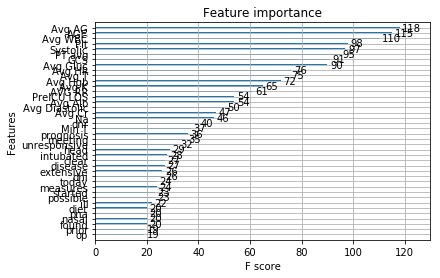

In [25]:
#Feature importance
plot_importance(model, height=0.2, importance_type='weight', max_num_features=40)
plt.show()

In [26]:
#creating labels for confusion matrix
from sklearn import metrics
print('true:', y_test.values[0:100])
print('pred:', y_pred_class[0:100])

true: [0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
pred: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [27]:
#Confusion matrix slices
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(confusion)

[[2743    9]
 [ 213   57]]


In [28]:
#accuracy Calculation
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9265387160820648
0.9265387160820648


In [29]:
#calculating null accuracy
max(y_test.mean(), 1-y_test.mean())

0.9106551952349438

In [30]:
#Senitivity
print(metrics.recall_score(y_test, y_pred_class))
TP / float(TP + FN)

0.2111111111111111


0.2111111111111111

In [31]:
#Specificity
print(TN / float(TN + FP))

0.9967296511627907


In [32]:
#Store Predicted Prob
y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred_prob

array([1.3310742e-04, 2.7201974e-03, 2.0024665e-04, ..., 4.8529892e-03,
       3.2763458e-03, 5.1950828e-05], dtype=float32)

In [33]:
#AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9115525409130061

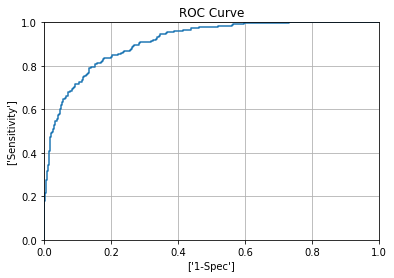

In [34]:
from sklearn.metrics import roc_curve  
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob, pos_label=1)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC Curve")
plt.xlabel(['1-Spec'])
plt.ylabel(['Sensitivity'])
plt.grid(True)

In [87]:
(model_y, model_x) = calibration_curve(y_test, y_pred_prob, n_bins=10,strategy='quantile')

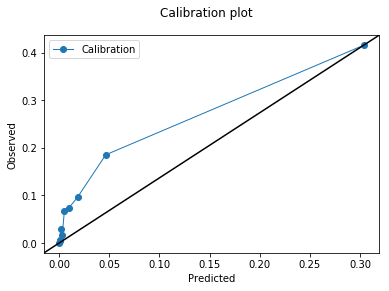

In [88]:
%matplotlib inline
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(model_x,model_y, marker='o', linewidth=1, label='Calibration')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted')
ax.set_ylabel('Observed')
plt.legend()
plt.show()

In [37]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [140]:
evaluate_threshold(0.15)

Sensitivity: 0.3592592592592593
Specificity: 0.9632994186046512


In [39]:
from sklearn.model_selection import learning_curve

In [42]:
#Creating learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring = make_scorer(roc_auc_score, needs_proba=True), n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))

KeyboardInterrupt: 

In [ ]:
#Means and std of test/train scores
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

In [ ]:
#PLot lines of learning curve
plt.plot(train_sizes, train_mean, '--', color="#111111", label = "Training Score")
plt.plot(train_sizes, test_mean, color = "#111111", label = "Test score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("AUC"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [387]:
#y_test = le.inverse_transform(y_test)


In [388]:
#y_pred_class = le.inverse_transform(y_pred_class)

In [389]:
#y_test [0:10] PROBLMSS BELOW

In [46]:
df1 = np.array(y_pred_prob)
df2 = np.array(y_test)
df3 = pd.DataFrame(df1, df2)
df3 [0:10]

,0
0,0.000881
0,0.007215
0,0.001116
0,0.000881
0,0.000086
1,0.595460
0,0.041052
1,0.064825
0,0.000827
1,0.117828


In [47]:
filepath = r'c:\\Users\mvf11\Desktop\Research\NoteHospMortResults.xlsx'

In [48]:
df3.to_excel(filepath)